In [ ]:
from sklearn import preprocessing, metrics, tree, ensemble
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.pipeline import make_pipeline
#-----------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold,cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from keras.preprocessing.text import Tokenizer
import csv
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
#-----------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
#-----------------------------------------------------------
# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from sklearn.metrics import cohen_kappa_score


In [ ]:
# Reading our dataset
df = pd.read_csv('/dataset path', usecols=['ypred', 'ytest'])

#df.sentiment= df.sentiment.map({'positive':1, 'negative':-1, 'neutral':0})

ytest = df.ytest
ypred = df.ypred

In [ ]:
print("precision_score: {:.4f}".format(precision_score(ytest, ypred, average='weighted')))
print("recall_score: {:.4f}".format(recall_score(ytest, ypred, average='weighted')))
print("F1: {:.4f}".format(f1_score(ytest, ypred, average='weighted')))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(ytest, ypred)))

precision_score: 0.7974
recall_score: 0.7467
F1: 0.7385
cohen_kappa_score: 0.6200


In [ ]:
df1 = pd.read_excel('/dataset path', usecols=['mazajak', 'manual'])


yt = df1.manual
yp = df1.mazajak
print("---")
print("precision_score: {:.4f}".format(precision_score(yt, yp, average='weighted')))
print("recall_score: {:.4f}".format(recall_score(yt, yp, average='weighted')))
print("F1: {:.4f}".format(f1_score(yt, yp, average='weighted')))

MAIN CODE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 300

In [ ]:
# Reading our dataset
df = pd.read_excel('/dataset path', usecols=['tweet', 'sentiment'])

df.sentiment= df.sentiment.map({'positive':1, 'negative':-1, 'neutral':0})

X = df.tweet
y = df.sentiment

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
#Reading stop words

def get_stopwords_list(stop_file_path):    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

stopwords_path = "/stop_words_arabic.txt"
stopwords = get_stopwords_list(stopwords_path)

#----------------------------------------------------------------------

#Remove stop words

def remove_stop_words(corpus):
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stopwords:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
        
    return results

In [ ]:
X_train = remove_stop_words(X_train)

In [ ]:
# Instantiate the CountVectorizer method
tfidf = TfidfVectorizer()

# Fit the training data and then return the matrix
training_data = tfidf.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf.transform(X_test)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=11, random_state=seed)#max_depth=4, 
dt.fit(training_data,y_train)
y_pred_dt = dt.predict(testing_data)
dt_acc = accuracy_score(y_test,y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

knn = KNeighborsClassifier(n_neighbors=17)#n_neighbors=13
knn.fit(training_data,y_train)
y_pred_knn = knn.predict(testing_data)
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)


In [ ]:
conf_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix: DT")
print(conf_dt)
print("\nClassification Report: Decision Tree",)
print (dt_report)
#print("Accuracy on training set: {:.4f}".format(dt.score(training_data,y_train)))
print("Accuracy on test set: {:.4f}".format(dt.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_dt, average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, y_pred_dt, average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_dt, average='weighted')))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(y_test, y_pred_dt)))

print("----------------------------------------------------------------------")

conf_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix: KNN")
print(conf_knn)
print("\nClassification Report: k-nearest neighbors",)
print(knn_report)
#print("Accuracy on training set: {:.4f}".format(knn.score(training_data,y_train)))
print("Accuracy on test set: {:.4f}".format(knn.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test,y_pred_knn, average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test,y_pred_knn, average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_knn, average='weighted')))
#print("specificity: {:.4f}".format(recall_score(y_test, y_pred_knn,pos_label=0)))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(y_test, y_pred_knn)))

print("----------------------------------------------------------------------")

Confusion Matrix: DT
[[5150  786   82]
 [1917 1926   42]
 [ 566  219  278]]

Classification Report: Decision Tree
              precision    recall  f1-score   support

          -1       0.67      0.86      0.75      6018
           0       0.66      0.50      0.57      3885
           1       0.69      0.26      0.38      1063

    accuracy                           0.67     10966
   macro avg       0.67      0.54      0.57     10966
weighted avg       0.67      0.67      0.65     10966

Accuracy on test set: 0.6706
f1: 0.6511
precision_score: 0.6701
recall_score: 0.6706
cohen_kappa_score: 0.3663
----------------------------------------------------------------------

Confusion Matrix: KNN
[[2629 3279  110]
 [ 294 3536   55]
 [ 117  555  391]]

Classification Report: k-nearest neighbors
              precision    recall  f1-score   support

          -1       0.86      0.44      0.58      6018
           0       0.48      0.91      0.63      3885
           1       0.70      0.37     

In [ ]:
gb = GradientBoostingClassifier(random_state=seed)#max_depth=4, 
gb.fit(training_data,y_train)
y_pred_gb = gb.predict(testing_data)
gb_acc = accuracy_score(y_test,y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)


conf_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix: gb")
print(conf_gb)
print("\nClassification Report: Decision Tree",)
print (gb_report)
#print("Accuracy on training set: {:.4f}".format(dt.score(training_data,y_train)))
print("Accuracy on test set: {:.4f}".format(gb.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, y_pred_gb, average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, y_pred_gb, average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, y_pred_gb, average='weighted')))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(y_test, y_pred_gb)))

print("----------------------------------------------------------------------")

Confusion Matrix: gb
[[5221  729   68]
 [1430 2407   48]
 [ 450  234  379]]

Classification Report: Decision Tree
              precision    recall  f1-score   support

          -1       0.74      0.87      0.80      6018
           0       0.71      0.62      0.66      3885
           1       0.77      0.36      0.49      1063

    accuracy                           0.73     10966
   macro avg       0.74      0.61      0.65     10966
weighted avg       0.73      0.73      0.72     10966

Accuracy on test set: 0.7302
f1: 0.7190
precision_score: 0.7308
recall_score: 0.7302
cohen_kappa_score: 0.4922
----------------------------------------------------------------------


In [ ]:
# Instantiate our model
naive_bayes = MultinomialNB()

# Fit our model to the training data
naive_bayes.fit(training_data,y_train)#X_train_tomek, y_train_tomek

# Predict on the test data
predictions_nb = naive_bayes.predict(testing_data)

naive_bayes_report = classification_report(y_test, predictions_nb,digits=4)

In [ ]:
conf_nb = confusion_matrix(y_test, predictions_nb)
print("Confusion Matrix: ")
print(conf_nb)
print("\nClassification Report:",)
print (naive_bayes_report)
print("Accuracy on test set: {:.4f}".format(naive_bayes.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions_nb,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions_nb,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions_nb,average='weighted')))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(y_test, predictions_nb)))

print("----------------------------------------------------------------------")

Confusion Matrix: 
[[5723  294    1]
 [1517 2368    0]
 [ 702  309   52]]

Classification Report:
              precision    recall  f1-score   support

          -1     0.7206    0.9510    0.8199      6018
           0     0.7970    0.6095    0.6908      3885
           1     0.9811    0.0489    0.0932      1063

    accuracy                         0.7426     10966
   macro avg     0.8329    0.5365    0.5346     10966
weighted avg     0.7729    0.7426    0.7037     10966

Accuracy on test set: 0.7426
f1: 0.7037
precision_score: 0.7729
recall_score: 0.7426
cohen_kappa_score: 0.4913
----------------------------------------------------------------------


Text(0.5, 1.0, 'Naive Bayes ')

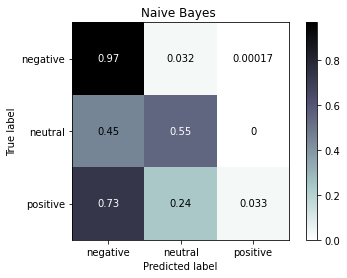

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions_nb,cmap='bone_r',display_labels = class_labels, normalize='true') #,normalize='true'
plt.title('Naive Bayes ')

In [ ]:
# Instantiate our model
lr = LogisticRegression(random_state=seed)

# Fit our model to the training data
lr.fit(training_data,y_train)#X_train_tomek, y_train_tomek

# Predict on the test data
predictions_lr = lr.predict(testing_data)

lr_report = classification_report(y_test, predictions_lr)

In [ ]:
conf_lr = confusion_matrix(y_test, predictions_lr)
print("Confusion Matrix: ")
print(conf_lr)
print("\nClassification Report:",)
print (lr_report)
print("Accuracy on test set: {:.4f}".format(lr.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions_lr,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions_lr,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions_lr,average='weighted')))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(y_test, predictions_lr)))

print("----------------------------------------------------------------------")

Confusion Matrix: 
[[5494  471   53]
 [ 685 3142   58]
 [ 269  252  542]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.91      0.88      6018
           0       0.81      0.81      0.81      3885
           1       0.83      0.51      0.63      1063

    accuracy                           0.84     10966
   macro avg       0.83      0.74      0.77     10966
weighted avg       0.84      0.84      0.83     10966

Accuracy on test set: 0.8370
f1: 0.8322
precision_score: 0.8361
recall_score: 0.8370
cohen_kappa_score: 0.7017
----------------------------------------------------------------------


Text(0.5, 1.0, 'Logistic Regression')

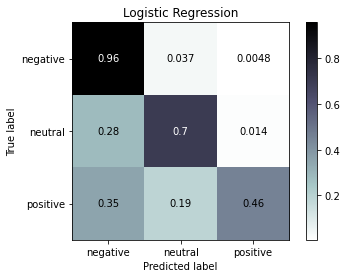

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions_lr,cmap='bone_r',display_labels = class_labels,normalize='true') 
plt.title('Logistic Regression')

In [ ]:
# Instantiate our model
rf = RandomForestClassifier(random_state=seed)

# Fit our model to the training data
rf.fit(training_data,y_train)

# Predict on the test data
predictions_rf = rf.predict(testing_data)

rf_report = classification_report(y_test, predictions_rf)

In [ ]:
conf_rf= confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix: ")
print(conf_rf)
print("\nClassification Report:",)
print (rf_report)
print("Accuracy on test set: {:.4f}".format(rf.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions_rf,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions_rf,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions_rf,average='weighted')))
print("cohen_kappa_score: {:.4f}".format(cohen_kappa_score(y_test, predictions_rf)))

print("----------------------------------------------------------------------")

Confusion Matrix: 
[[5369  623   26]
 [ 906 2933   46]
 [ 397  273  393]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.89      0.85      6018
           0       0.77      0.75      0.76      3885
           1       0.85      0.37      0.51      1063

    accuracy                           0.79     10966
   macro avg       0.81      0.67      0.71     10966
weighted avg       0.79      0.79      0.78     10966

Accuracy on test set: 0.7929
f1: 0.7836
precision_score: 0.7949
recall_score: 0.7929
cohen_kappa_score: 0.6153
----------------------------------------------------------------------


Text(0.5, 1.0, 'Random Forest')

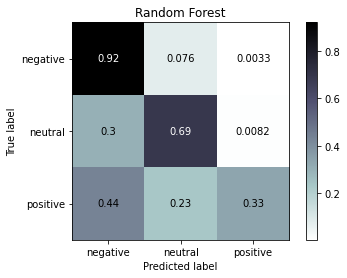

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions_rf,cmap='bone_r',display_labels = class_labels,normalize='true') 
plt.title('Random Forest')

Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=10)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score,average='weighted'),
    'f1': make_scorer(f1_score,average='weighted'),
    'precision': make_scorer(precision_score,average='weighted'),
}

cv=skf

In [ ]:

scores = cross_validate(naive_bayes, training_data,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.73813328481291
f1 0.6997266439925044
precision 0.7711554409044838
recall 0.73813328481291


In [ ]:
scores = cross_validate(lr, training_data,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.8260907870339043
f1 0.8205982728925623
precision 0.8271531720265871
recall 0.8260907870339043


In [ ]:
scores = cross_validate(rf, training_data,y_train, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.7879255970283215
f1 0.7790216573092198
precision 0.791691944390261
recall 0.7879255970283215


Over-sampling

In [ ]:
#used
sm = SMOTE(random_state=seed)
X_train_res, y_train_res = sm.fit_resample(training_data, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({-1: 23683, 0: 23683, 1: 23683})


In [ ]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='all'),random_state=seed)
X_train_res, y_train_res = resample.fit_resample(training_data, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({1: 23676, -1: 23519, 0: 23516})


In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_train_enn, y_train_renn = enn.fit_resample(training_data, y_train)
print('Resampled dataset shape %s' % Counter(y_train_renn))

Resampled dataset shape Counter({0: 14558, 1: 4300, -1: 317})


In [ ]:
# Instantiate our model
naive_bayes = MultinomialNB()

# Fit our model to the training data
naive_bayes.fit(X_train_res, y_train_res)#X_train_tomek, y_train_tomek

# Predict on the test data
predictions_nb = naive_bayes.predict(testing_data)

naive_bayes_report = classification_report(y_test, predictions_nb)

In [ ]:
conf_nb = confusion_matrix(y_test, predictions_nb)
print("Confusion Matrix: ")
print(conf_nb)
print("\nClassification Report:",)
print (naive_bayes_report)
print("Accuracy on test set: {:.4f}".format(naive_bayes.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions_nb,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions_nb,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions_nb,average='weighted')))

print("----------------------------------------------------------------------")

Confusion Matrix: 
[[5339  391  288]
 [1018 2399  468]
 [ 271   99  693]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.89      0.84      6018
           0       0.83      0.62      0.71      3885
           1       0.48      0.65      0.55      1063

    accuracy                           0.77     10966
   macro avg       0.70      0.72      0.70     10966
weighted avg       0.78      0.77      0.77     10966

Accuracy on test set: 0.7688
f1: 0.7678
precision_score: 0.7826
recall_score: 0.7688
----------------------------------------------------------------------


Text(0.5, 1.0, 'Naive Bayes ')

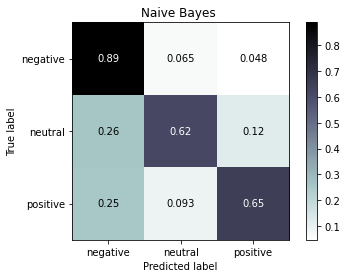

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions_nb,cmap='bone_r',display_labels = class_labels,normalize='true') 
plt.title('Naive Bayes ')

In [ ]:
# Instantiate our model
lr = LogisticRegression(random_state=seed)

# Fit our model to the training data
lr.fit(X_train_res, y_train_res)#X_train_tomek, y_train_tomek

# Predict on the test data
predictions_lr = lr.predict(testing_data)

lr_report = classification_report(y_test, predictions_lr)

In [ ]:
conf_lr = confusion_matrix(y_test, predictions_lr)
print("Confusion Matrix: ")
print(conf_lr)
print("\nClassification Report:",)
print (lr_report)
print("Accuracy on test set: {:.4f}".format(lr.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions_lr,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions_lr,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions_lr,average='weighted')))

print("----------------------------------------------------------------------")

Confusion Matrix: 
[[5570  329  119]
 [ 872 2839  174]
 [ 223  154  686]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.93      0.88      6018
           0       0.85      0.73      0.79      3885
           1       0.70      0.65      0.67      1063

    accuracy                           0.83     10966
   macro avg       0.80      0.77      0.78     10966
weighted avg       0.83      0.83      0.83     10966

Accuracy on test set: 0.8294
f1: 0.8263
precision_score: 0.8293
recall_score: 0.8294
----------------------------------------------------------------------


Text(0.5, 1.0, 'Logistic Regression')

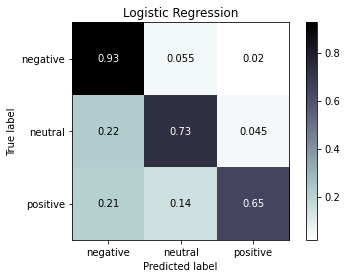

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions_lr,cmap='bone_r',display_labels = class_labels,normalize='true') 
plt.title('Logistic Regression')

In [ ]:
# Instantiate our model
rf = RandomForestClassifier(random_state=seed)

# Fit our model to the training data
rf.fit(X_train_res, y_train_res)

# Predict on the test data
predictions_rf = rf.predict(testing_data)

rf_report = classification_report(y_test, predictions_rf)

In [ ]:
conf_rf= confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix: ")
print(conf_rf)
print("\nClassification Report:",)
print (rf_report)
print("Accuracy on test set: {:.4f}".format(rf.score(testing_data, y_test)))
print("f1: {:.4f}".format(f1_score(y_test, predictions_rf,average='weighted')))
print("precision_score: {:.4f}".format(precision_score(y_test, predictions_rf,average='weighted')))
print("recall_score: {:.4f}".format(recall_score(y_test, predictions_rf,average='weighted')))

print("----------------------------------------------------------------------")

Confusion Matrix: 
[[5267  643  108]
 [ 921 2869   95]
 [ 318  218  527]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.88      0.84      6018
           0       0.77      0.74      0.75      3885
           1       0.72      0.50      0.59      1063

    accuracy                           0.79     10966
   macro avg       0.77      0.70      0.73     10966
weighted avg       0.79      0.79      0.79     10966

Accuracy on test set: 0.7900
f1: 0.7855
precision_score: 0.7868
recall_score: 0.7900
----------------------------------------------------------------------


Text(0.5, 1.0, 'Random Forest')

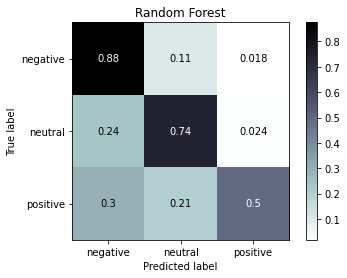

In [ ]:
class_labels = ['negative', 'neutral', 'positive']
ConfusionMatrixDisplay.from_predictions(y_test, predictions_rf,cmap='bone_r',display_labels = class_labels,normalize='true') 
plt.title('Random Forest')

Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=10)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score,average='weighted'),
    'f1': make_scorer(f1_score,average='weighted'),
    'precision': make_scorer(precision_score,average='weighted'),
}

cv=skf

In [ ]:

scores = cross_validate(naive_bayes, X_train_res, y_train_res, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.8324734404466397
f1 0.8296753331009562
precision 0.8342471669347974
recall 0.8324734404466397


In [ ]:
scores = cross_validate(lr, X_train_res, y_train_res, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.897032218781576
f1 0.8965990392878632
precision 0.8981812707632575
recall 0.897032218781576


In [ ]:
scores = cross_validate(rf, X_train_res, y_train_res, cv=cv,
                         scoring=scoring,
                        return_train_score=False)
sorted(scores.keys())

print('accuracy',scores['test_accuracy'].mean())
print('f1',scores['test_f1'].mean())
print('precision',scores['test_precision'].mean())
print('recall',scores['test_sensitivity'].mean())

accuracy 0.8885328597432249
f1 0.8878982929031338
precision 0.8922599004263964
recall 0.8885328597432249
